In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [604]:
# abro mi df
df = pd.read_csv("./data/final_final.csv")

# paso las fechas a datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_film          591 non-null    int64         
 1   year_ceremony      591 non-null    int64         
 2   ceremony           591 non-null    int64         
 3   film               591 non-null    object        
 4   winner             591 non-null    bool          
 5   original_language  591 non-null    object        
 6   original_title     591 non-null    object        
 7   release_date       591 non-null    datetime64[ns]
 8   vote_average       591 non-null    float64       
 9   genre              591 non-null    object        
 10  rating             590 non-null    float64       
 11  duration           591 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 51.5+ KB


In [605]:
df[df["rating"].isna()]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration
7,1928,1929,2,The Patriot,False,en,The Patriot,1928-09-01,5.0,['Drama'],NaN,113.0


In [606]:
df['rating'] = df['rating'].fillna(df['vote_average'])

# paso duration a float
df['duration'] = df['duration'].str.strip("[]'").str.replace(',', '.').astype(float)

In [607]:
# paso genre a lista
generos = df.genre.tolist()

df['genre'] = df['genre'].apply(ast.literal_eval)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_film          591 non-null    int64         
 1   year_ceremony      591 non-null    int64         
 2   ceremony           591 non-null    int64         
 3   film               591 non-null    object        
 4   winner             591 non-null    bool          
 5   original_language  591 non-null    object        
 6   original_title     591 non-null    object        
 7   release_date       591 non-null    datetime64[ns]
 8   vote_average       591 non-null    float64       
 9   genre              591 non-null    object        
 10  rating             591 non-null    float64       
 11  duration           591 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 51.5+ KB


## Dividir las películas por eras

In [609]:
eras_bins = [1927, 1955, 1977, 2000, float('inf')]
eras_labels = ['Golden Era', 'The Change', 'Modern Era', 'New Millennium']

df['era'] = pd.cut(df['year_film'], bins=eras_bins, labels=eras_labels, right=False)

golden_era = df[df['era'] == 'Golden Era']
the_change = df[df['era'] == 'The Change']
modern_era = df[df['era'] == 'Modern Era']
new_millennium = df[df['era'] == 'New Millennium']

In [610]:
df.to_csv("./data/final_limpio.csv")

## To-do list

All time
- [x] generos: ver los géneros con más y menos nominaciones
- [x] Analizar la distribución de las fechas de lanzamiento de las películas nominadas y ganadoras.
- [x] duracion / victoria

Por eras
- [x] Realizar comparaciones detalladas entre las películas de diferentes eras en términos de votación, duración, género, etc.
Identificar posibles cambios en las preferencias a lo largo de las eras.


Por década
- [x] distribución de generos (en consecuencia a sucesos y tendencias en el mundo real)
- [x] idiomas

Solo New Millennium
- [x] ratings / victoria

In [611]:
df.sample(25)

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration,era
38,1934,1935,7,Flirtation Walk,False,en,Flirtation Walk,1934-12-01,5.400,"[Music, Romance]",5.6,97.0,Golden Era
44,1934,1935,7,One Night of Love,False,en,One Night of Love,1934-07-16,5.700,"[Music, Romance]",5.6,84.0,Golden Era
43,1934,1935,7,It Happened One Night,True,en,It Happened One Night,1934-02-22,7.844,"[Comedy, Romance]",8.1,105.0,Golden Era
142,1944,1945,17,Going My Way,True,en,Going My Way,1944-05-15,6.760,"[Comedy, Drama, Music]",7.0,126.0,Golden Era
397,1995,1996,68,Braveheart,True,en,Braveheart,1995-05-24,7.936,"[Action, Drama, History, War]",8.3,178.0,Modern Era
555,2019,2020,92,The Irishman,False,en,The Irishman,2019-11-01,7.614,"[Crime, Drama, History]",7.8,209.0,New Millennium
280,1972,1973,45,Cabaret,False,en,Cabaret,1972-02-13,7.378,"[Music, Drama, Romance]",7.8,124.0,The Change
507,2013,2014,86,Her,False,en,Her,2013-12-18,7.860,"[Romance, Science Fiction, Drama]",8.0,126.0,New Millennium
117,1941,1942,14,One Foot in Heaven,False,en,One Foot in Heaven,1941-11-01,6.559,"[Drama, Romance]",6.7,108.0,Golden Era
267,1969,1970,42,"Hello, Dolly!",False,en,"Hello, Dolly!",1969-12-12,7.000,"[Comedy, Romance, Music]",7.0,146.0,The Change


### Comparación entre eras

In [612]:
df_exploded = df.explode('genre')

df_exploded['genre_position'] = df_exploded.groupby(level=0).cumcount() + 1
column_order = ['year_film', 'year_ceremony', 'ceremony', 'film', 'winner',
                'original_language', 'original_title', 'release_date', 'vote_average',
                'genre_position', 'genre', 'rating', 'duration', 'era']

df_exploded = df_exploded[column_order]
df_exploded

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre_position,genre,rating,duration,era
0,1927,1928,1,The Racket,False,en,The Racket,1928-11-01,6.400,1,Crime,6.6,84.0,Golden Era
0,1927,1928,1,The Racket,False,en,The Racket,1928-11-01,6.400,2,Drama,6.6,84.0,Golden Era
1,1927,1928,1,7th Heaven,False,en,7th Heaven,1927-09-10,7.317,1,Drama,7.6,110.0,Golden Era
1,1927,1928,1,7th Heaven,False,en,7th Heaven,1927-09-10,7.317,2,Romance,7.6,110.0,Golden Era
2,1927,1928,1,Wings,True,en,Wings,1927-08-12,7.198,1,Drama,7.5,144.0,Golden Era
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2022,2023,95,Top Gun: Maverick,False,en,Top Gun: Maverick,2022-05-24,8.237,2,Drama,8.3,130.0,New Millennium
589,2022,2023,95,Triangle of Sadness,False,en,Triangle of Sadness,2022-09-18,7.116,1,Comedy,7.3,147.0,New Millennium
589,2022,2023,95,Triangle of Sadness,False,en,Triangle of Sadness,2022-09-18,7.116,2,Drama,7.3,147.0,New Millennium
590,2022,2023,95,Women Talking,False,en,Women Talking,2022-12-23,6.908,1,Drama,6.9,104.0,New Millennium


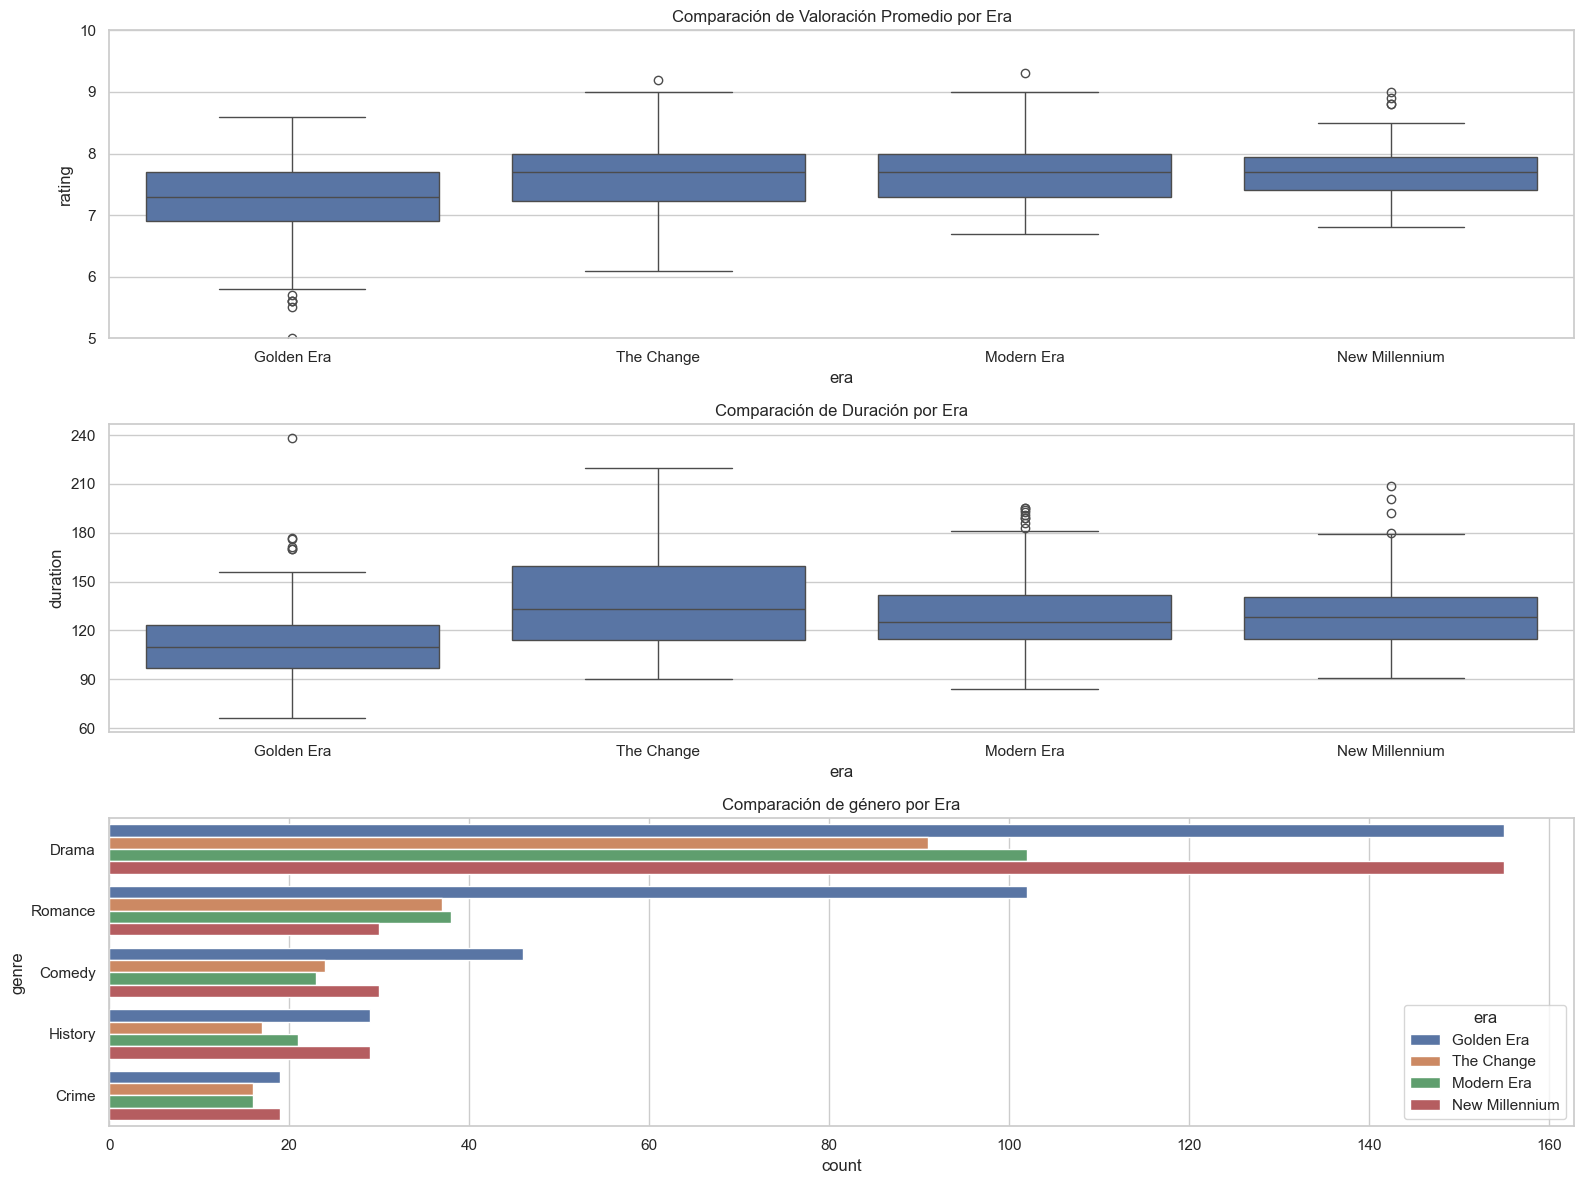

In [613]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Comparación de Valoración Promedio
plt.subplot(3, 1, 1)
sns.boxplot(x='era', y='rating', data=df)
plt.ylim(df['rating'].min(),10)
plt.title('Comparación de Valoración Promedio por Era')

# Comparación de Duración
plt.subplot(3, 1, 2)
plt.yticks
sns.boxplot(x='era', y='duration', data=df)
y_min = df['duration'].min()
y_max = df['duration'].max()
plt.yticks(np.arange(np.floor(y_min/30)*30, np.ceil(y_max/30)*30 + 30, 30))
plt.title("Comparación de Duración por Era")

# Comparación de Géneros
plt.subplot(3, 1, 3)
top_genres = df_exploded['genre'].value_counts().nlargest(5).index
df_top_genres = df_exploded[df_exploded['genre'].isin(top_genres)]
sns.countplot(y='genre', hue='era', data=df_top_genres, order=df_top_genres['genre'].value_counts().index)
plt.title('Comparación de género por Era')


plt.tight_layout()
plt.show()

IMDB empezó en el 90  

Comparación de Valoración Promedio por Era
- curioso como las cajas no pasan del 8
- muy pocas pelis con más de un 9
- la golden era tiene unos ratings bajisimos

Comparación de Duración por Era
- pensaba que las pelis eran cada vez más largas
- wtf lo que el viento se llevó dura 4 horas

Comparación de Género por Era
- aplastante victoria de drama
- romance a tope en la golden age

### Género
La mayoria de peliculas estan listadas con varios generos, estudio el porcentaje de cada género del total de nominaciones
- géneros all time
- géneros por década

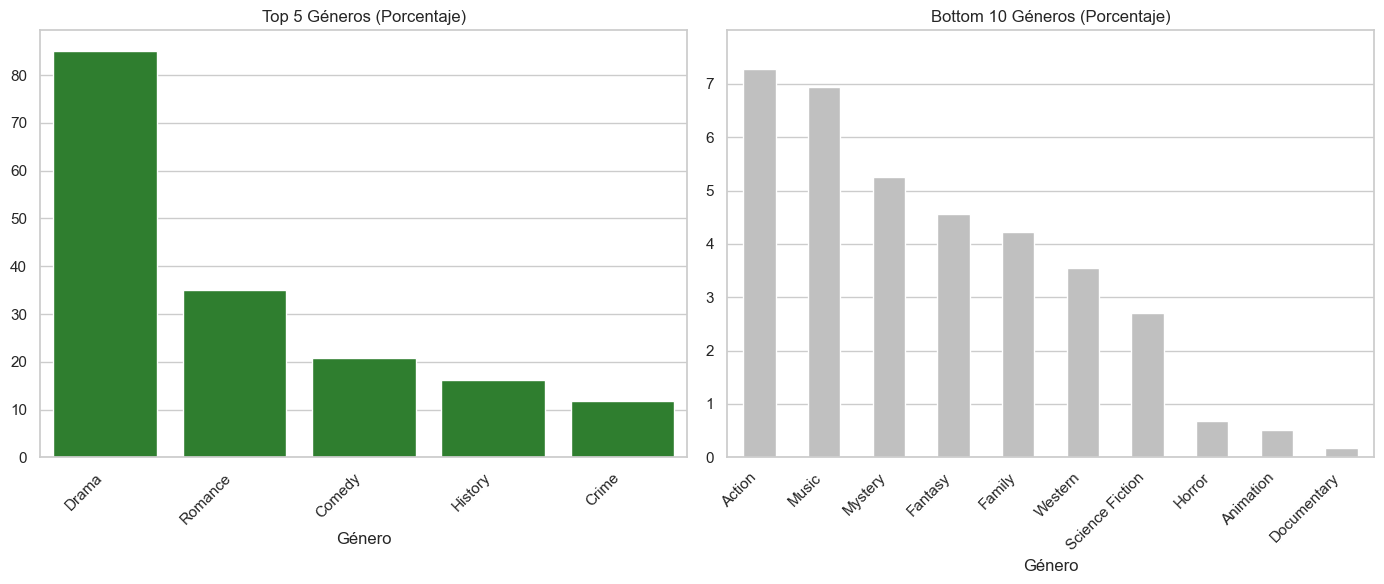

In [638]:
# Obtener los géneros más y menos populares
top_genres = df_exploded['genre'].value_counts().nlargest(5).index
bottom_genres = df_exploded['genre'].value_counts().nsmallest(10).index

# Calcular porcentajes
total_entries = len(df)
top_genres_percentage = df_exploded['genre'].value_counts().nlargest(5) / total_entries * 100
bottom_genres_percentage = df_exploded['genre'].value_counts().nsmallest(10) / total_entries * 100

# Figure
plt.figure(figsize=(14, 6))

# Top
plt.subplot(1, 2, 1)
sns.barplot(x=top_genres_percentage.index, y=top_genres_percentage.values, color='forestgreen')
plt.title('Top 5 Géneros (Porcentaje)')
plt.xlabel('Género')
plt.ylabel("")
plt.xticks(rotation=45, ha='right')

# Bottom
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_genres_percentage.index, y=bottom_genres_percentage.values, color='silver', saturation=.3, width=.5, order=bottom_genres[::-1])
plt.title('Bottom 10 Géneros (Porcentaje)')
plt.xlabel('Género')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 8, 1))
plt.ylabel("")
plt.ylim(0, 8)
plt.tight_layout()
plt.show()


In [615]:
df_exploded[df_exploded["genre"]=="Documentary"]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre_position,genre,rating,duration,era
441,2004,2005,77,Finding Neverland,False,en,Finding Neverland,2004-10-17,7.321,2,Documentary,7.7,106.0,New Millennium


In [616]:
# ojeando las pelis comedia
comedy_movies = df_exploded[df_exploded['genre'] == 'Comedy']
result_df = df[df['film'].isin(comedy_movies['film'])]
result_df


,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration,era
6,1928,1929,2,The Hollywood Revue of 1929,False,en,The Hollywood Revue of 1929,1929-11-23,5.583,"[Comedy, Music]",5.8,130.0,Golden Era
12,1929,1930,3,The Love Parade,False,en,The Love Parade,1930-01-18,6.464,"[Comedy, Romance]",7.0,107.0,Golden Era
15,1930,1931,4,The Front Page,False,en,The Front Page,1931-04-04,6.500,"[Comedy, Crime, Drama, Romance]",6.7,101.0,Golden Era
16,1930,1931,4,Skippy,False,en,Skippy,1931-04-25,6.176,"[Drama, Family, Comedy]",6.3,85.0,Golden Era
23,1931,1932,5,One Hour with You,False,en,One Hour with You,1932-03-23,6.509,"[Comedy, Romance]",7.1,78.0,Golden Era
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2021,2022,94,Don't Look Up,False,en,Don't Look Up,2021-12-07,7.125,"[Comedy, Science Fiction, Drama]",7.2,138.0,New Millennium
577,2021,2022,94,Licorice Pizza,False,en,Licorice Pizza,2021-11-26,6.998,"[Drama, Comedy, Romance]",7.1,133.0,New Millennium
583,2022,2023,95,The Banshees of Inisherin,False,en,The Banshees of Inisherin,2022-10-20,7.457,"[Drama, Comedy]",7.7,114.0,New Millennium
586,2022,2023,95,The Fabelmans,False,en,The Fabelmans,2022-11-11,7.692,"[Drama, Comedy]",7.5,151.0,New Millennium


- De 590 películas que tengo el género Drama aparece 500, más del 80%
- El único documental que hay no es un docu, es un biopic
- Terror: historicamente las pelis de miedo son nominadas a categorias tecnicas o de acting
    - carrie 4 nominaciones
    - babadook
    - suspiria
    - rosemarys baby 2 nominaciones
    - psycho 4 nominaciones

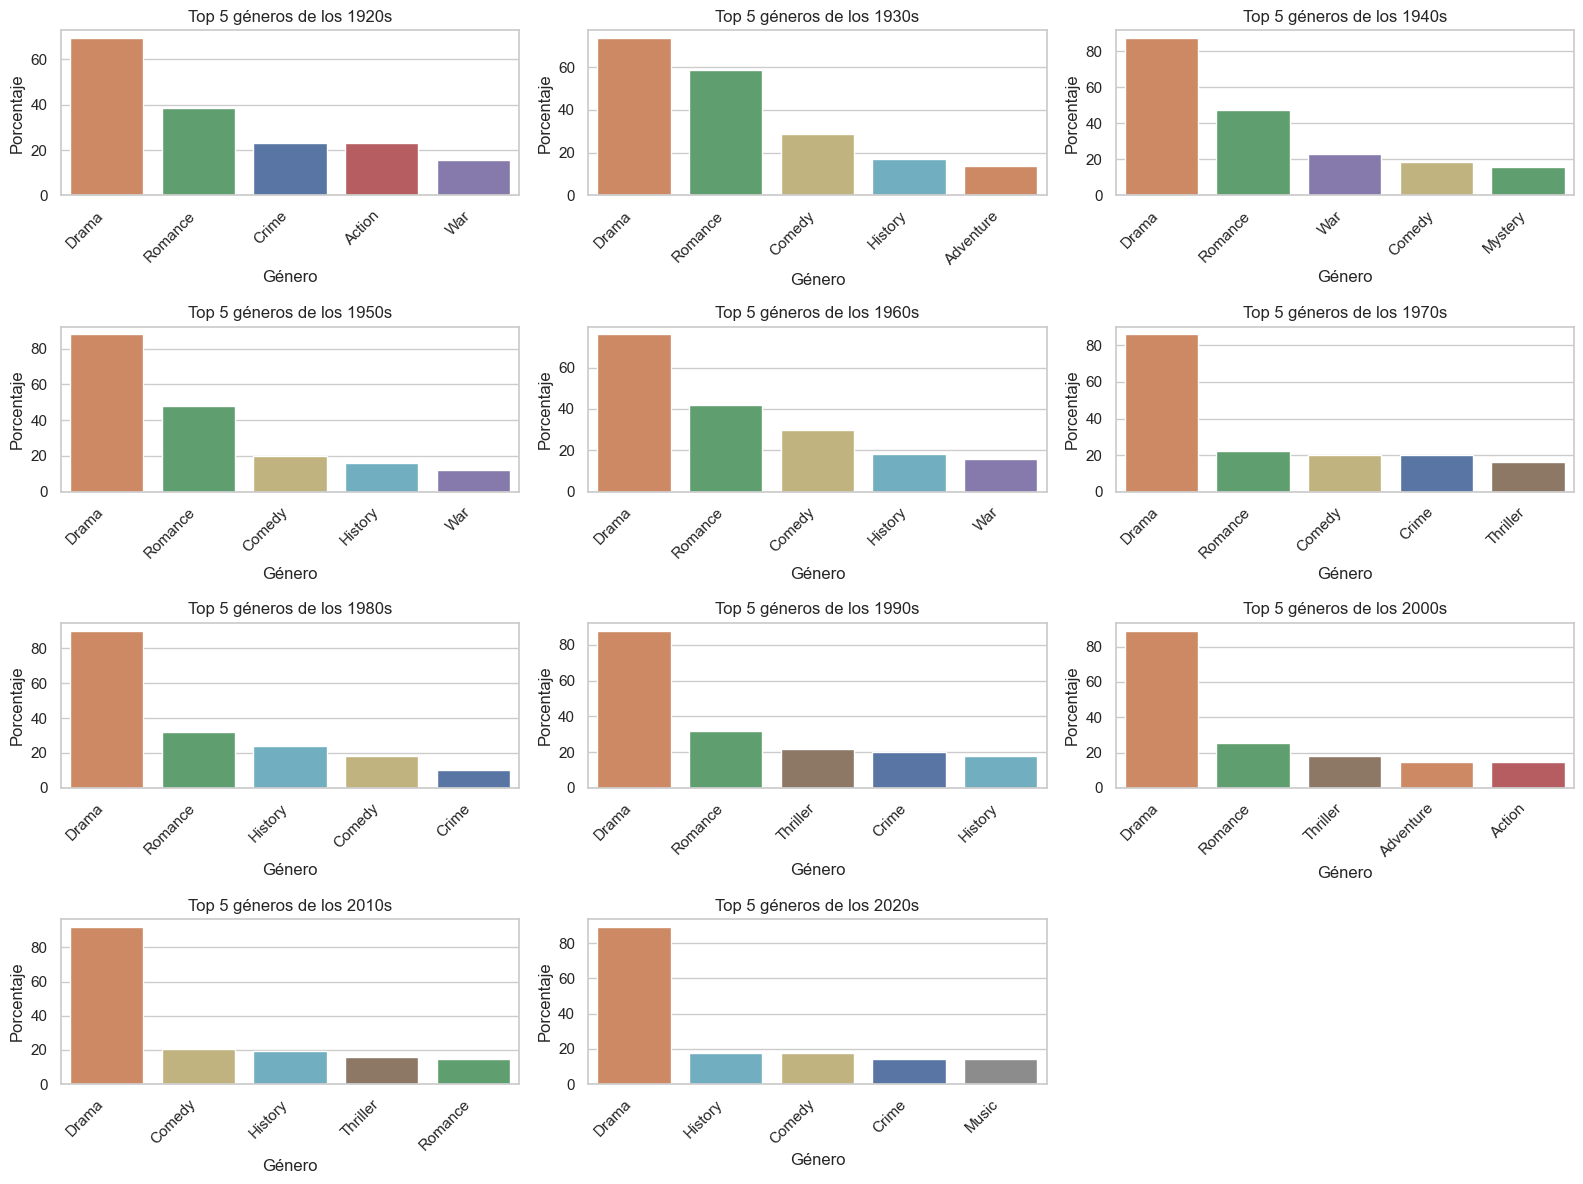

In [617]:
### PORCIENTOS

# Crear una nueva columna 'decade' en el DataFrame
df['decade'] = df['year_film'] // 10 * 10

# Obtener el número total de décadas
num_decades = len(df['decade'].unique())

# Crear subgráficos para la distribución de géneros por década
plt.figure(figsize=(16, 12))
rows = (num_decades // 3) + (num_decades % 3 > 0)  # Calcular el número de filas necesarias

for i, decade in enumerate(sorted(df['decade'].unique())):
    plt.subplot(rows, 3, i + 1)

    # Datos
    top_genres = df[df['decade'] == decade].explode('genre')['genre'].value_counts().head(5)
    all_genres = df['genre'].explode().unique()

    # Calcular porcentajes
    total_movies_in_decade = len(df[df['decade'] == decade])
    percentages = (top_genres / total_movies_in_decade) * 100

    # Asignar un color a cada género
    palette = sns.color_palette("deep", n_colors=len(all_genres))
    genre_color_mapping = dict(zip(all_genres, palette))
    colors = [genre_color_mapping[genre] for genre in top_genres.index]

    # Graficar con porcentajes
    sns.barplot(x=top_genres.index, y=percentages.values, order=top_genres.index,
                palette=colors, hue=top_genres.index)
    
    plt.title(f'Top 5 géneros de los {decade}s')
    plt.xlabel('Género')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- drama y romance(casi) dominan década tras década
    - despiertan emociones en el publico
    - relatable content
    - catarsis emocional
    - impacto duradero

- war:
    - 20s: venimos de la WWI
    - 40s: WWII
    - 50s: korea
    - 60s: vietnam

In [618]:
df_exploded = df.explode('genre')

df_exploded['genre_position'] = df_exploded.groupby(level=0).cumcount() + 1
column_order = ['year_film', 'year_ceremony', 'ceremony', 'film', 'winner',
                'original_language', 'original_title', 'release_date', 'vote_average',
                'genre_position', 'genre', 'rating', 'duration', 'era', 'decade']

df_exploded = df_exploded[column_order]


In [619]:
df_exploded[(df_exploded["genre"]=="War")&(df_exploded["genre_position"]==1)]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre_position,genre,rating,duration,era,decade
40,1934,1935,7,Here Comes the Navy,False,en,Here Comes the Navy,1934-07-21,5.813,1,War,6.2,87.0,Golden Era,1930
131,1943,1944,16,For Whom the Bell Tolls,False,en,For Whom the Bell Tolls,1943-07-12,6.552,1,War,6.8,170.0,Golden Era,1940
169,1949,1950,22,Twelve O'Clock High,False,en,Twelve O'Clock High,1949-12-21,7.095,1,War,7.7,132.0,Golden Era,1940
176,1951,1952,24,Decision before Dawn,False,en,Decision Before Dawn,1951-12-21,6.700,1,War,7.2,119.0,Golden Era,1950
185,1953,1954,26,From Here to Eternity,True,en,From Here to Eternity,1953-08-28,7.298,1,War,7.6,118.0,Golden Era,1950
226,1961,1962,34,The Guns of Navarone,False,en,The Guns of Navarone,1961-04-27,7.313,1,War,7.5,158.0,The Change,1960
231,1962,1963,35,The Longest Day,False,en,The Longest Day,1962-09-25,7.595,1,War,7.7,178.0,The Change,1960
274,1970,1971,43,Patton,True,en,Patton,1970-01-25,7.511,1,War,7.9,172.0,The Change,1970
493,2011,2012,84,War Horse,False,en,War Horse,2011-12-25,7.306,1,War,7.2,146.0,New Millennium,2010
512,2014,2015,87,American Sniper,False,en,American Sniper,2014-12-25,7.429,1,War,7.3,133.0,New Millennium,2010


In [620]:
df_exploded[(df_exploded["decade"]==2010)&(df_exploded["genre"]=="Romance")]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre_position,genre,rating,duration,era,decade
485,2011,2012,84,The Artist,True,fr,The Artist,2011-10-12,7.458,3,Romance,7.9,100.0,New Millennium,2010
490,2011,2012,84,Midnight in Paris,False,en,Midnight in Paris,2011-05-11,7.536,3,Romance,7.6,94.0,New Millennium,2010
494,2012,2013,85,Amour,False,fr,Amour,2012-09-20,7.763,2,Romance,7.9,127.0,New Millennium,2010
501,2012,2013,85,Silver Linings Playbook,False,en,Silver Linings Playbook,2012-11-16,7.134,3,Romance,7.7,122.0,New Millennium,2010
507,2013,2014,86,Her,False,en,Her,2013-12-18,7.860,1,Romance,8.0,126.0,New Millennium,2010
518,2014,2015,87,The Theory of Everything,False,en,The Theory of Everything,2014-11-26,7.859,2,Romance,7.7,123.0,New Millennium,2010
522,2015,2016,88,Brooklyn,False,en,Brooklyn,2015-10-20,7.311,1,Romance,7.5,117.0,New Millennium,2010
533,2016,2017,89,La La Land,False,en,La La Land,2016-11-29,7.901,3,Romance,8.0,128.0,New Millennium,2010
537,2017,2018,90,Call Me by Your Name,False,en,Call Me by Your Name,2017-09-01,8.160,1,Romance,7.8,132.0,New Millennium,2010
542,2017,2018,90,Phantom Thread,False,en,Phantom Thread,2017-12-25,7.304,2,Romance,7.4,130.0,New Millennium,2010


In [621]:
df_exploded[((df_exploded["decade"]==2010)|(df_exploded["decade"]==2020))&(df_exploded["genre"]=="Romance")]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre_position,genre,rating,duration,era,decade
485,2011,2012,84,The Artist,True,fr,The Artist,2011-10-12,7.458,3,Romance,7.9,100.0,New Millennium,2010
490,2011,2012,84,Midnight in Paris,False,en,Midnight in Paris,2011-05-11,7.536,3,Romance,7.6,94.0,New Millennium,2010
494,2012,2013,85,Amour,False,fr,Amour,2012-09-20,7.763,2,Romance,7.9,127.0,New Millennium,2010
501,2012,2013,85,Silver Linings Playbook,False,en,Silver Linings Playbook,2012-11-16,7.134,3,Romance,7.7,122.0,New Millennium,2010
507,2013,2014,86,Her,False,en,Her,2013-12-18,7.860,1,Romance,8.0,126.0,New Millennium,2010
518,2014,2015,87,The Theory of Everything,False,en,The Theory of Everything,2014-11-26,7.859,2,Romance,7.7,123.0,New Millennium,2010
522,2015,2016,88,Brooklyn,False,en,Brooklyn,2015-10-20,7.311,1,Romance,7.5,117.0,New Millennium,2010
533,2016,2017,89,La La Land,False,en,La La Land,2016-11-29,7.901,3,Romance,8.0,128.0,New Millennium,2010
537,2017,2018,90,Call Me by Your Name,False,en,Call Me by Your Name,2017-09-01,8.160,1,Romance,7.8,132.0,New Millennium,2010
542,2017,2018,90,Phantom Thread,False,en,Phantom Thread,2017-12-25,7.304,2,Romance,7.4,130.0,New Millennium,2010


### Distribución género secundario
el genero secundario más popular en el new millennium

C:\Users\Nur\AppData\Local\Temp\ipykernel_6884\198033152.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, order=top_genres.index, palette="deep")


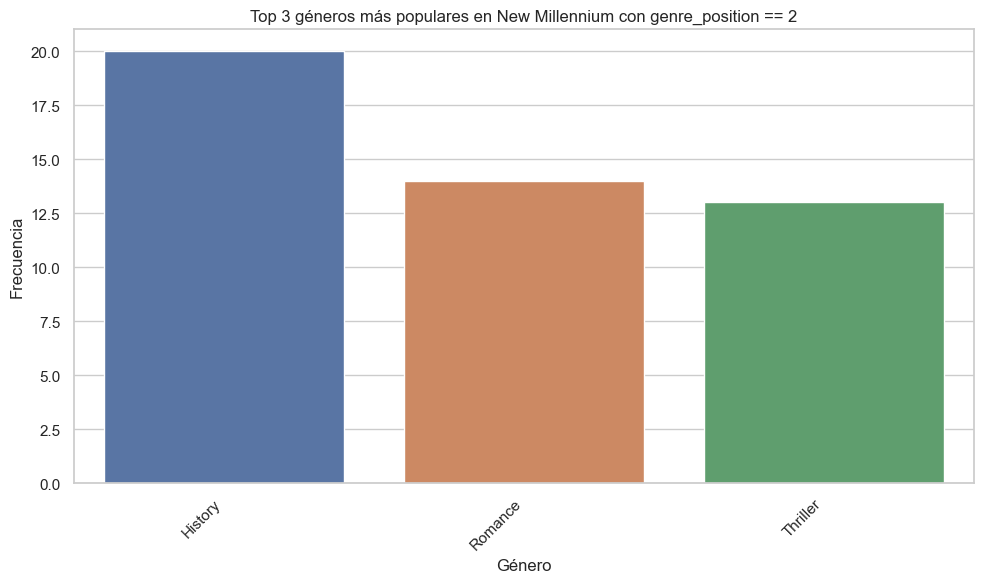

In [622]:
# Filtrar películas por 'New Millennium' y genre_position == 2
filtered_df = df_exploded[(df_exploded['genre_position'] == 2) & (df_exploded['era'] == 'New Millennium')]

# Obtener los tres géneros más populares
top_genres = filtered_df.explode('genre')['genre'].value_counts().iloc[1:4]


# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Graficar con porcentajes
sns.barplot(x=top_genres.index, y=top_genres.values, order=top_genres.index, palette="deep")

plt.title('Top 3 géneros más populares en New Millennium con genre_position == 2')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Distribucion de fechas de lanzamiento

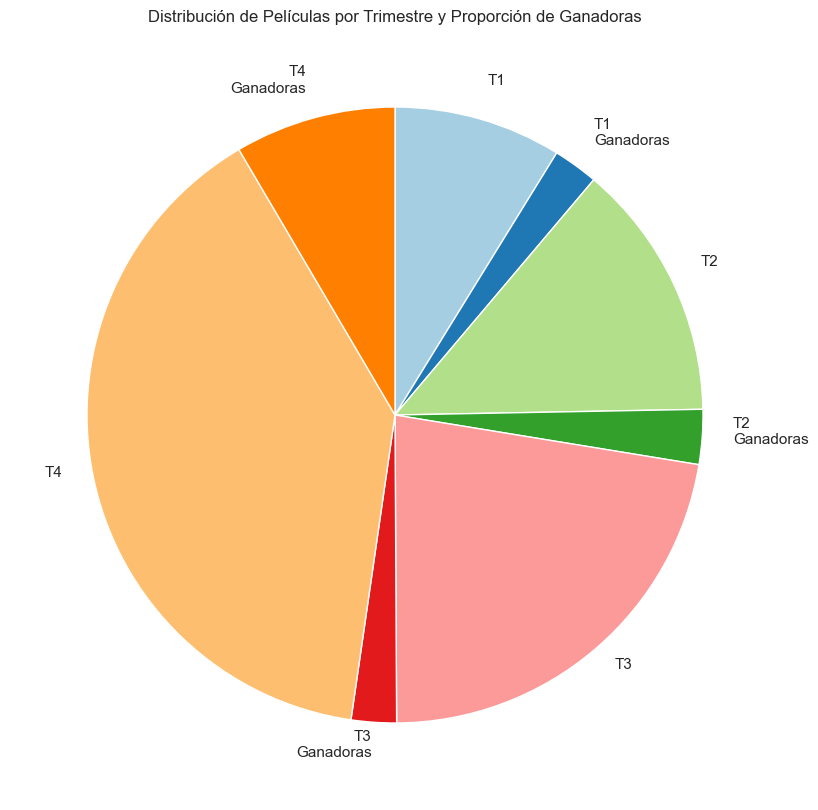

In [642]:
# Extrae el trimestre de cada fecha de lanzamiento
df['release_quarter'] = df['release_date'].dt.quarter

# Mapea los números del trimestre a nombres
quarter_mapping = {1: 'T1', 2: 'T2', 3: 'T3', 4: 'T4'}
df['release_quarter'] = df['release_quarter'].map(quarter_mapping)

# Crea un DataFrame auxiliar con información de ganadoras por trimestre
info_ganadoras = df[df['winner']].groupby('release_quarter').size()

# Ordena los trimestres cronológicamente
quarters_order = ['T1', 'T2', 'T3', 'T4']

# Crea un gráfico de tarta (pie plot) para mostrar la distribución de fechas de lanzamiento por trimestre
plt.figure(figsize=(10, 10))


# Inicializa listas para etiquetas y porcentajes
labels_all = []
porcentajes_all = []

for i, quarter in enumerate(quarters_order):
    # Filtra las películas del trimestre actual
    subset_df = df[df['release_quarter'] == quarter]
    
    # Cuenta la frecuencia de películas por trimestre
    counts_per_quarter = subset_df.shape[0]
    
    # Cuenta la frecuencia de películas ganadoras por trimestre
    counts_ganadoras = info_ganadoras.get(quarter, default=0)
    
    # Calcula la proporción de ganadoras en el trimestre
    porcentaje_ganadoras = (counts_ganadoras / counts_per_quarter) * 100
    
    # Etiquetas para el gráfico
    labels = [f'{quarter}\n', f'{quarter}\nGanadoras\n']
    
    # Agrega las etiquetas y porcentajes a las listas
    labels_all.extend(labels)
    porcentajes_all.extend([counts_per_quarter - counts_ganadoras, counts_ganadoras])

# Crea el gráfico de tarta
plt.pie(porcentajes_all, labels=labels_all, startangle=90,
        counterclock=False, colors=sns.set_palette("Paired"))

plt.title('Distribución de Películas por Trimestre y Proporción de Ganadoras')
plt.show()


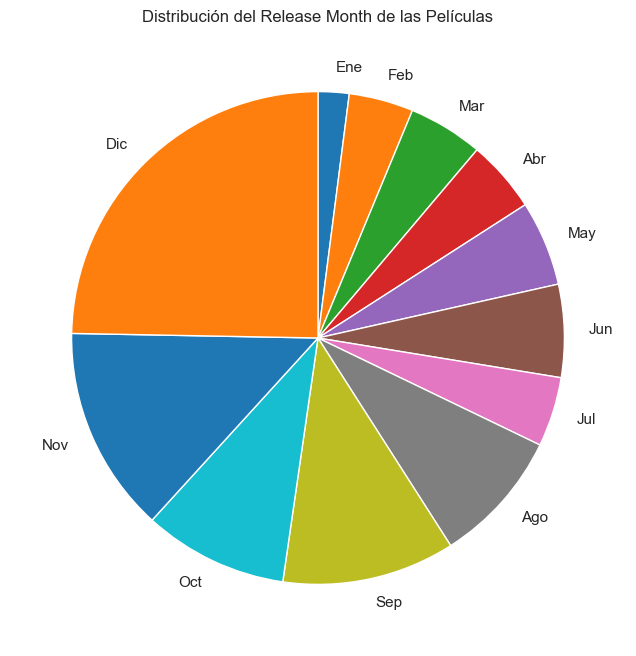

In [624]:


# Extraer el mes y crear una nueva columna 'release_month'
df['release_month'] = df['release_date'].dt.month

# Contar la frecuencia de cada mes y ordenar por mes
month_counts = df['release_month'].value_counts().sort_index()

# Crear el pie plot con labels de meses
month_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_labels, startangle=90, colors=sns.color_palette("tab10"), counterclock=False)

plt.title('Distribución del Release Month de las Películas')
plt.show()


Las nominaciones de los oscars son principalmente peliculas estrenadas a finales de año, especialmente en el mes de diciembre

### Duracion

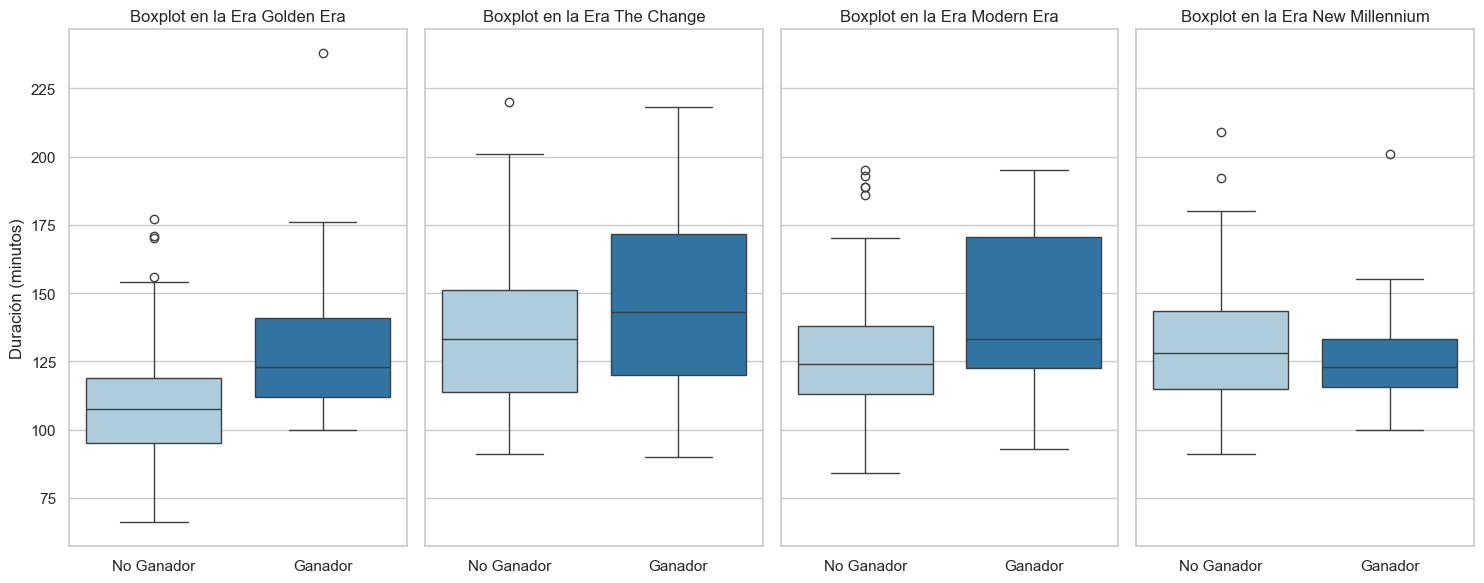

In [625]:

# Crear subplots para cada era
eras = df['era'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(eras), figsize=(15, 6), sharey=True)

for i, era in enumerate(eras):
    era_data = df[df['era'] == era]
    sns.boxplot(data=era_data, x='winner', y='duration', ax=axes[i], hue="winner", legend=False)
    axes[i].set_title(f'Boxplot en la Era {era}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Duración (minutos)')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No Ganador', 'Ganador'])

plt.tight_layout()
plt.show()


### Idioma

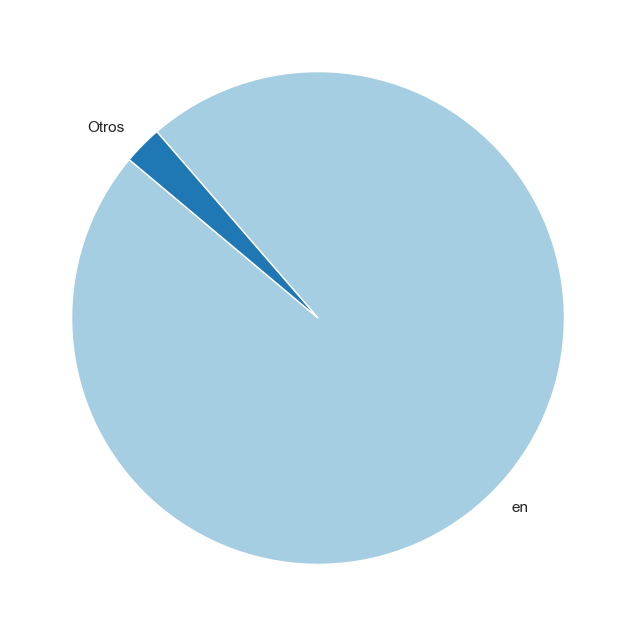

In [643]:
language_counts = df['original_language'].value_counts()

# Agrupar todos los idiomas, excepto 'en', en 'Otros'
language_counts_others = language_counts.copy()
language_counts_others['Otros'] = language_counts[language_counts.index != 'en'].sum()
language_counts_others = language_counts_others.drop(language_counts[language_counts.index != 'en'].index)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(language_counts_others, labels=language_counts_others.index, startangle=140)
plt.title('')
plt.show()


### Rating / Winner

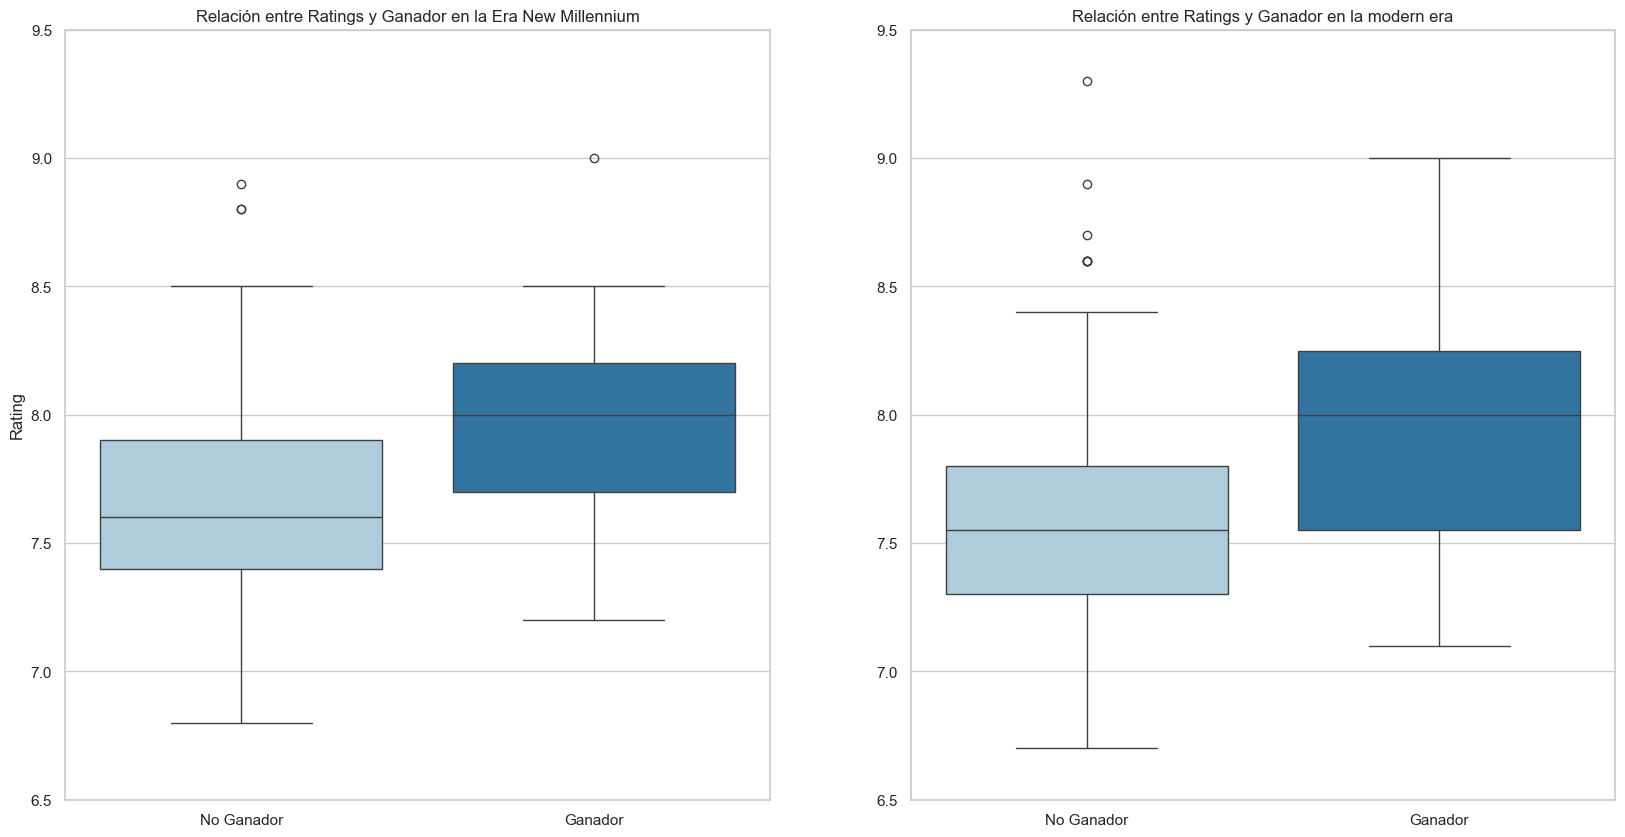

In [627]:

plt.figure(figsize=(20,10))
ylim_range = (new_millennium['rating'].min()-.3, 9.5)

plt.subplot(1,2,1)
sns.boxplot(data=new_millennium, x='winner', y='rating',hue="winner", legend=False)
plt.title('Relación entre Ratings y Ganador en la Era New Millennium')
plt.xlabel('')
plt.ylabel('Rating')
plt.ylim(ylim_range)
plt.xticks([0, 1], ['No Ganador', 'Ganador'])

plt.subplot(1,2,2)
sns.boxplot(data=modern_era, x='winner', y='rating',hue="winner", legend=False)
plt.title('Relación entre Ratings y Ganador en la modern era')
plt.xlabel('')
plt.ylabel('')
plt.ylim(ylim_range)
plt.xticks([0, 1], ['No Ganador', 'Ganador'])
plt.show()


## Análisis de las ganadoras

8. **Comparación entre Eras para Películas Ganadoras:**
   - Realiza un análisis comparativo de las características de las películas ganadoras en diferentes eras (Golden Era, The Change, New Millennium).
   - ¿Hay patrones específicos en cada era?

10. **Análisis de Palabras Clave en Títulos y Géneros:**
    - Realiza un análisis de palabras clave en los títulos y géneros de las películas ganadoras.
    - ¿Existen palabras o temas comunes en las películas premiadas?

Al realizar estos análisis, podrás identificar patrones y tendencias que te ayudarán a comprender mejor qué características podrían influir en el éxito de una película en los premios Oscar. Recuerda ajustar el enfoque según tus datos y objetivos específicos.

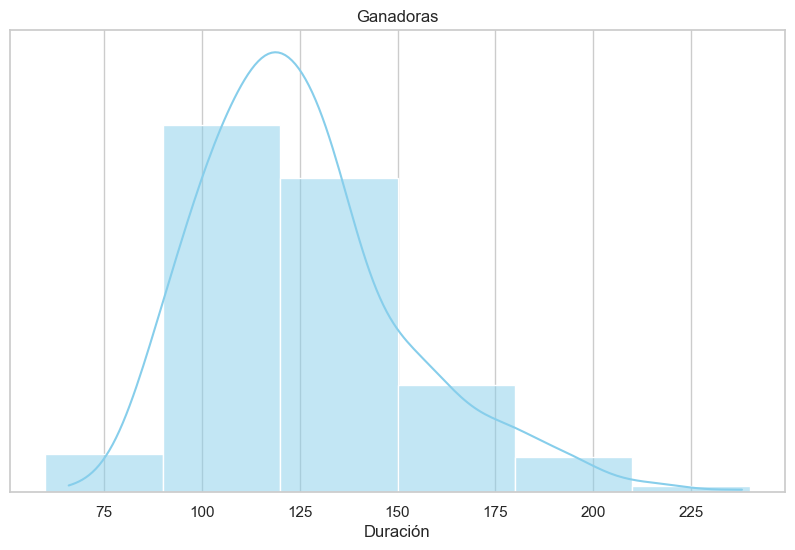

In [636]:


# Crear el histplot
plt.figure(figsize=(10, 6))
binwidth = 15
bin_edges = [i * 30 for i in range(int(df['duration'].min() // 30),
                                   int(df['duration'].max() // 30) + 2)]

sns.histplot(df['duration'], bins=bin_edges, kde=True, color='skyblue')
plt.title('Ganadoras')
plt.xlabel('Duración')
plt.ylabel('')
plt.yticks([])
plt.show()


In [647]:
df[(df["winner"]==True)&(df["original_language"]!= "en")]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration,era,decade,release_quarter,release_month
485,2011,2012,84,The Artist,True,fr,The Artist,2011-10-12,7.458,"[Drama, Comedy, Romance]",7.9,100.0,New Millennium,2010,T4,10
562,2019,2020,92,Parasite,True,ko,기생충,2019-05-30,8.511,"[Comedy, Thriller, Drama]",8.5,132.0,New Millennium,2010,T2,5
